<a href="https://colab.research.google.com/github/juan-holguin/Senales_Sistemas/blob/main/Ejercicios/Ejercicios_Modelado_de_SLITs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios Modelado de SLITs: Senales y Sistemas 2024-II

1. Encuentre la funcion de transfetencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente figura.

<center>

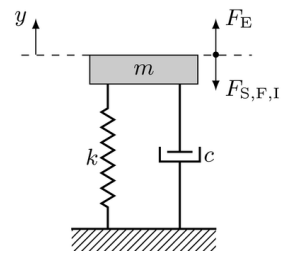
</center>


Ecuacion diferencial:

$$m\frac{d^2y(t)}{dt}+c\frac{dy(t)}{dt}+ky=F_E(t)$$

Tomamos la transformada de laplace:

$$ms^2Y(s)+csY(s)+kY(s)=F_E(s)$$

Factorizamos:

$$Y(s)(ms^2+cs+k)=F_E(s)$$

Ahora sacamos la funcion de transferencia:

$$H(s)=\frac{Y(s)}{F_E(s)}=\frac{1}{ms^2+cs+k}$$





2. Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortiguador, a partir del siguiente circuito electrico:

<center>

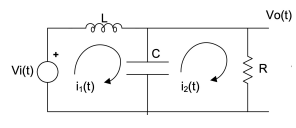
</center>

Ecuacion diferecial del circuto RLC serie:

$$L\frac{d^2u_o(t)}{dt}+R\frac{du_o(t)}{dt}+\frac{1}{c}u_o(t)=\frac{1}{c}u_i(t)$$

Ahora igualamos cada uno de los terminos con la ecuacion del pendulo elastico amortiguado:

Señal de entrada circuito: $u_i(t)=F_E(t)C$

Señal de entrada pendulo: $F_E(t)=\frac{u_i(t)}{C}$

Señal de salida circuito: $u_o(t)$

Señal de salida pendulo: $y(t)$

Inductancia en el circuito: $L=m$

Masa en el pendulo: $m=L$

Resistencia en el circuito: $R=c$

Amortiguamiento en el pendulo: $c=R$

Capacitancia en el circuito: $C=\frac{1}{k}$

Constant del resorte en el pendulo: $k=\frac{1}{C}$






3. Proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado, sobreamortiguado, y
de amortiguamiento cr ́ıtico (determine el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no
amortiguada, el tiempo pico, tiempo de levantamiento y el tiempo de establecimiento en cada caso). Para cada caso, grafique el
diagrama de polos y ceros, el diagrama de Bode, la respuesta impulso, respuesta escalon y respuesta rampa. Repita el proceso para  ́
modo lazo cerrado.

In [18]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

In [19]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

{c: 1/10, k: 5/2, m: 0.1}

In [20]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                         ⎛        ____________⎞    ↪
             ⎛        ____________⎞          ⎛       ____________⎞       ⎜       ╱  2         ⎟    ↪
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟     t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠    ↪
           t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠       -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠     ────────────────────────    ↪
           ────────────────────────       ─────────────────────────              2⋅m               ↪
                     2⋅m                             2⋅m              ℯ                        ⋅θ( ↪
h(t) = C₁⋅ℯ                         + C₂⋅ℯ                          + ──────────────────────────── ↪
                                                                                ____________       ↪
                                                                               ╱  2                ↪
                                                                             ╲╱  c  - 4⋅k⋅m

In [21]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

In [22]:
h = solution_h.subs(integration_constants)
h

          ⎛        ____________⎞            ⎛       ____________⎞      
          ⎜       ╱  2         ⎟            ⎜      ╱  2         ⎟      
        t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠         -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠      
        ────────────────────────         ─────────────────────────     
                  2⋅m                               2⋅m                
       ℯ                        ⋅θ(t)   ℯ                         ⋅θ(t)
h(t) = ────────────────────────────── - ───────────────────────────────
                 ____________                      ____________        
                ╱  2                              ╱  2                 
              ╲╱  c  - 4⋅k⋅m                    ╲╱  c  - 4⋅k⋅m         

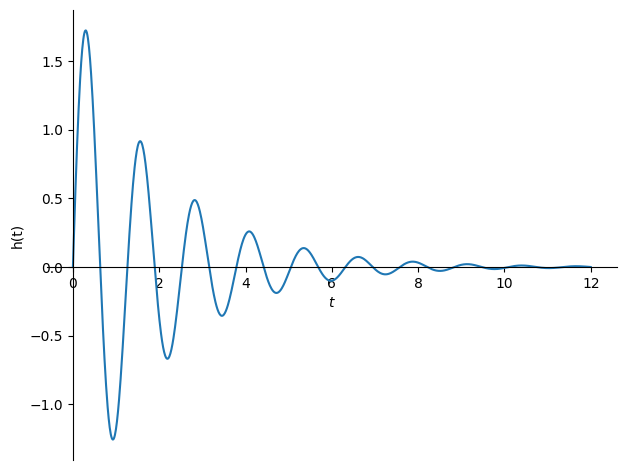

In [23]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

In [7]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [8]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

       1        
────────────────
               2
ⅈ⋅c⋅ω + k - m⋅ω 

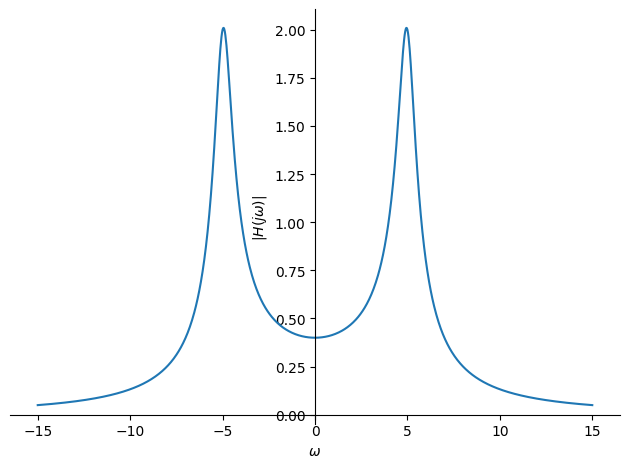

In [24]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

In [25]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

⎡         ____________        ____________⎤
⎢        ╱    2              ╱    2       ⎥
⎢       ╱    c              ╱    c        ⎥
⎢   -  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢    ╲╱      2           ╲╱      2        ⎥
⎢0, ───────────────────, ─────────────────⎥
⎣            m                   m        ⎦

In [26]:
w0 = extrema[1:3]
w0

⎡      ____________        ____________⎤
⎢     ╱    2              ╱    2       ⎥
⎢    ╱    c              ╱    c        ⎥
⎢-  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢ ╲╱      2           ╲╱      2        ⎥
⎢───────────────────, ─────────────────⎥
⎣         m                   m        ⎦

In [27]:
[w00.subs(mck) for w00 in w0]

[-4.94974746830583, 4.94974746830583]

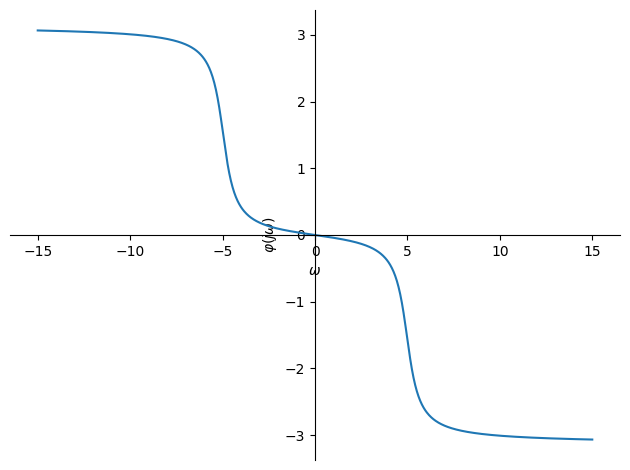

In [28]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');